In [21]:
# 准备数据
import torch
import numpy as np

n_train, n_test, n_inputs = 20, 100, 200
w_true, b_true = torch.ones(n_inputs, 1) * 0.01, 0.05
features = torch.randn((n_train + n_test, n_inputs))
labels = torch.matmul(features, w_true) + b_true
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
features_train, features_test = features[:n_train, :], features[n_train:, :]
labels_train, labels_test = labels[:n_train, :], labels[n_train:, :]

In [22]:
# 初始化模型参数
def init_params():
    
    w = torch.randn((n_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

def linreg(x, w, b):
    return x @ w + b

def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [23]:
# 定义L2范数惩罚
def l2_penalty(w):
    return (w ** 2).sum() / 2

In [24]:
# 训练与测试
from matplotlib import pyplot as plt

batch_size, epochs, lr = 1, 100, 0.003
net = linreg
loss = torch.nn.MSELoss()

dataset = torch.utils.data.TensorDataset(features_train, labels_train)
train_iter = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []

    for _ in range(epochs):
        for x, y in train_iter:
            l = loss(net(x, w, b), y) + lambd * l2_penalty(w)
            l = l.sum()
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            sgd([w, b], batch_size=batch_size, lr=lr)
        train_ls.append(loss(net(features_train, w, b),labels_train).mean().item())
        test_ls.append(loss(net(features_test, w, b),labels_test).mean().item())
    
    plt.semilogy(range(1, epochs+1), train_ls, label='train')
    plt.semilogy(range(1, epochs+1), test_ls, label='test')
    plt.legend()
    plt.show()

    print('L2 norm of w: ', w.norm().item())

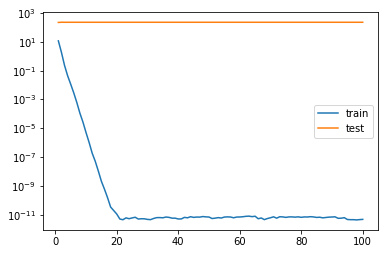

L2 norm of w:  13.242036819458008


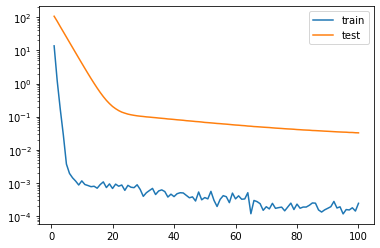

L2 norm of w:  0.04286477342247963


In [26]:
fit_and_plot(lambd=0)
fit_and_plot(lambd=3)